In [1]:
#dependencies
import matplotlib.pyplot as plt, pandas as pd

In [2]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#read each file to df
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
#check for missing city data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
#get unique city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
#get count of each city type
for city in city_data_df["type"].unique():
    print(city +": "  + str(sum(city_data_df["type"]==city)))

Urban: 66
Suburban: 36
Rural: 18


In [7]:
#check for missing ride data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
#merge datasets on city
pyber_data_df = pd.merge(ride_data_df,city_data_df, on=["city","city"], how="left")

In [15]:
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [18]:
#create urban df
urban_city_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
#create suburban df
suburban_city_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_city_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
#create rural df
rural_city_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [35]:
#get num rides in urban
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [36]:
#get num rides in suburban
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [37]:
#get num rides in rural
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [28]:
#get avg fares in city types
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_city_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [33]:
#get avg drivers for each city in types
urban_driver_count = urban_city_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_city_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_city_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

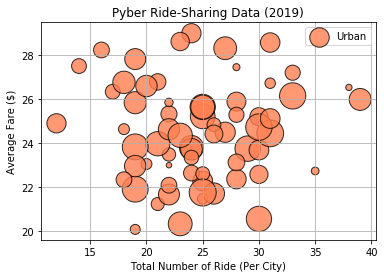

In [41]:
#create urban bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count,
           c="coral", alpha=0.8, edgecolor="black", lw=1, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)
plt.legend()

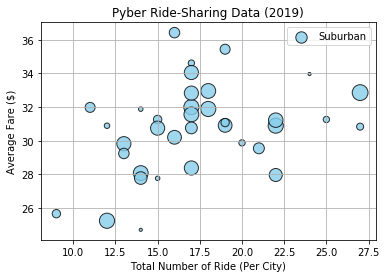

In [42]:
#create suburban bubble chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", alpha=0.8, edgecolor="black", lw=1, label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)
plt.legend()

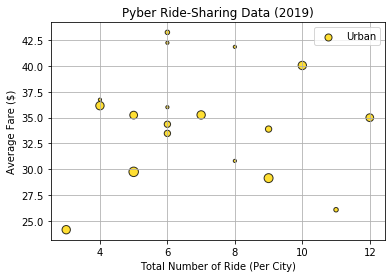

In [43]:
#create rural bubble chart
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
           c="gold", alpha=0.8, edgecolor="black", lw=1, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
plt.grid(True)
plt.legend()

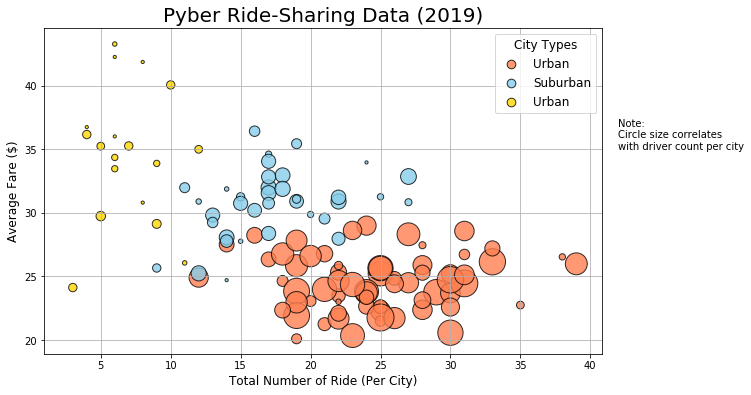

In [51]:
plt.subplots(figsize=(10,6))

#create urban bubble chart
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count,
           c="coral", alpha=0.8, edgecolor="black", lw=1, label="Urban")

#create suburban bubble chart
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count,
           c="skyblue", alpha=0.8, edgecolor="black", lw=1, label="Suburban")

#create rural bubble chart
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count,
           c="gold", alpha=0.8, edgecolor="black", lw=1, label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Ride (Per City)", fontsize=12)
plt.grid(True)

#set legend parameters
lgnd = plt.legend(fontsize=12, mode="Expanded",
                 scatterpoints=1, loc="best" , title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#set notes for graph
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city")

#Save the figure
plt.savefig("Analysis/Fig1.png")

plt.draw()

In [58]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [61]:
#new dependencies
import numpy as np
import scipy.stats as sts

In [79]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# Get the fares for the urban cities.
urban_fares = urban_city_df["fare"]

# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

# Get the driver count data from the urban cities.
urban_drivers = urban_city_df['driver_count']

# Calculate the measures of central tendency for the average drivers for the urban cities.
mean_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_drivers:.2f}.")

median_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_drivers:.2f}.")

mode_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_drivers}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean driver count for urban trips is 36.68.
The median driver count for urban trips is 37.00.
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [95]:
suburban_fares = suburban_city_df["fare"]
suburban_drivers = suburban_city_df['driver_count']
rural_fares = rural_city_df["fare"]
rural_drivers = rural_city_df['driver_count']

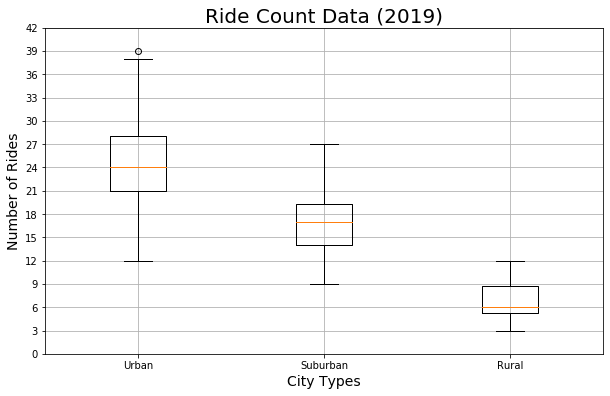

In [105]:
#create boxwhisker plot for urban ride count
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels=x_labels)
#add descriptors
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2_RideCount.png")
plt.draw()

In [87]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


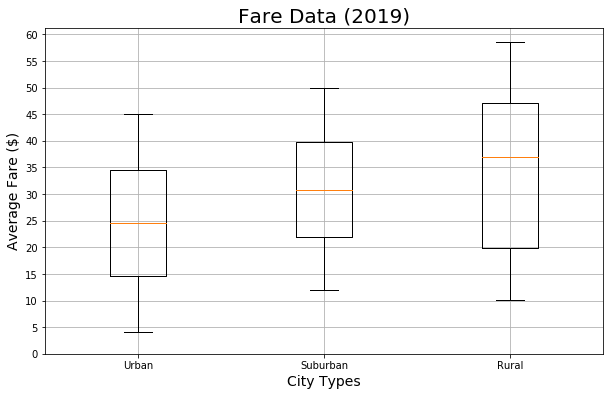

In [104]:
#create boxwhisker plot for urban ride count
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
#add descriptors
ax.set_title("Fare Data (2019)", fontsize=20)
ax.set_ylabel('Average Fare ($)', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,61,step=5.0))
ax.grid()
plt.savefig("Analysis/Fig3_FareData.png")
plt.draw()

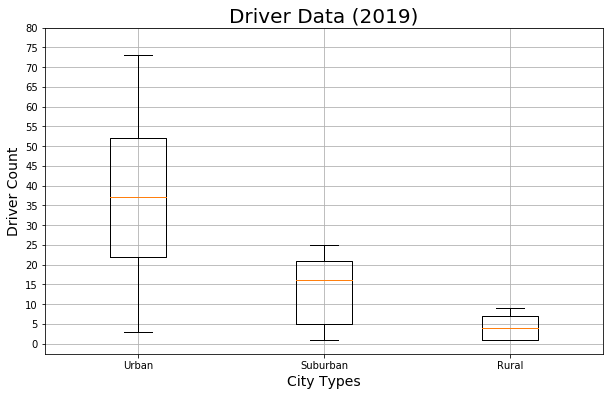

In [106]:
#create boxwhisker plot for urban ride count
x_labels = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels=x_labels)
#add descriptors
ax.set_title("Driver Data (2019)", fontsize=20)
ax.set_ylabel('Driver Count', fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,81,step=5.0))
ax.grid()
plt.savefig("Analysis/Fig4_DriverData.png")
plt.draw()

In [109]:
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [113]:
type_percents.dtypes

dtype('float64')

In [121]:
plt.pie(type_percents, labels=type_percents.keys(),
       colors=["gold","lightskyblue","lightcoral"],
       explode=[0,0,0.1], autopct='%1.1f%%', shadow=True, startangle=150,
       fontsize=14)
plt.title("% of Total Fares by City Type", fontsize=14)
plt.draw()

TypeError: pie() got an unexpected keyword argument 'fontsize'